In this notebook, we're going to build a classification model that discriminates between benign and malignant skin lesions using images from the [International Skin Imaging Collaboration (ISIC) 2016](https://challenge.isic-archive.com/data/) dataset we examined in a previous session.

This will also be our first encounter with [`scikit-learn`](https://scikit-learn.org/stable/index.html) — the most popular Python library for building and evaluating machine learning models.

In [1]:
!pip install scikit-learn
import sklearn

# Important: Run this code cell each time you start a new session!

In [2]:
!pip install numpy
!pip install pandas
!pip install matplotlib
!pip install os
!pip install opencv-python
!pip install scikit-learn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import cv2
import sklearn

ERROR: Could not find a version that satisfies the requirement os (from versions: none)
ERROR: No matching distribution found for os


In [3]:
!wget -Ncnp https://isic-challenge-data.s3.amazonaws.com/2016/ISBI2016_ISIC_Part3_Training_Data.zip

--2024-07-18 22:55:15--  https://isic-challenge-data.s3.amazonaws.com/2016/ISBI2016_ISIC_Part3_Training_Data.zip
Resolving isic-challenge-data.s3.amazonaws.com (isic-challenge-data.s3.amazonaws.com)... 52.217.122.49, 52.217.254.9, 52.217.74.196, ...
Connecting to isic-challenge-data.s3.amazonaws.com (isic-challenge-data.s3.amazonaws.com)|52.217.122.49|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 631625308 (602M) [application/zip]
Saving to: ‘ISBI2016_ISIC_Part3_Training_Data.zip’

ISBI2016_ISIC_Part3 100%[===================>] 602.36M  41.1MB/s    in 10s     

2024-07-18 22:55:26 (58.4 MB/s) - ‘ISBI2016_ISIC_Part3_Training_Data.zip’ saved [631625308/631625308]



In [4]:
!unzip -n ISBI2016_ISIC_Part3_Training_Data.zip

Archive:  ISBI2016_ISIC_Part3_Training_Data.zip
 extracting: ISBI2016_ISIC_Part3_Training_Data/ISIC_0000000.jpg  
 extracting: ISBI2016_ISIC_Part3_Training_Data/ISIC_0000001.jpg  
 extracting: ISBI2016_ISIC_Part3_Training_Data/ISIC_0000002.jpg  
 extracting: ISBI2016_ISIC_Part3_Training_Data/ISIC_0000004.jpg  
 extracting: ISBI2016_ISIC_Part3_Training_Data/ISIC_0000006.jpg  
 extracting: ISBI2016_ISIC_Part3_Training_Data/ISIC_0000007.jpg  
 extracting: ISBI2016_ISIC_Part3_Training_Data/ISIC_0000008.jpg  
 extracting: ISBI2016_ISIC_Part3_Training_Data/ISIC_0000009.jpg  
 extracting: ISBI2016_ISIC_Part3_Training_Data/ISIC_0000010.jpg  
 extracting: ISBI2016_ISIC_Part3_Training_Data/ISIC_0000011.jpg  
 extracting: ISBI2016_ISIC_Part3_Training_Data/ISIC_0000016.jpg  
 extracting: ISBI2016_ISIC_Part3_Training_Data/ISIC_0000017.jpg  
 extracting: ISBI2016_ISIC_Part3_Training_Data/ISIC_0000018.jpg  
 extracting: ISBI2016_ISIC_Part3_Training_Data/ISIC_0000019.jpg  
 extracting: ISBI2016_ISIC_P

In [5]:
!wget -Ncnp https://isic-challenge-data.s3.amazonaws.com/2016/ISBI2016_ISIC_Part3_Training_GroundTruth.csv

--2024-07-18 22:55:36--  https://isic-challenge-data.s3.amazonaws.com/2016/ISBI2016_ISIC_Part3_Training_GroundTruth.csv
Resolving isic-challenge-data.s3.amazonaws.com (isic-challenge-data.s3.amazonaws.com)... 3.5.11.158, 3.5.28.169, 3.5.12.48, ...
Connecting to isic-challenge-data.s3.amazonaws.com (isic-challenge-data.s3.amazonaws.com)|3.5.11.158|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 19419 (19K) [text/csv]
Saving to: ‘ISBI2016_ISIC_Part3_Training_GroundTruth.csv’

ISBI2016_ISIC_Part3 100%[===================>]  18.96K  --.-KB/s    in 0s      

2024-07-18 22:55:36 (81.3 MB/s) - ‘ISBI2016_ISIC_Part3_Training_GroundTruth.csv’ saved [19419/19419]



In [6]:
!wget -Ncnp https://isic-challenge-data.s3.amazonaws.com/2016/ISBI2016_ISIC_Part1_Training_GroundTruth.zip

--2024-07-18 22:55:36--  https://isic-challenge-data.s3.amazonaws.com/2016/ISBI2016_ISIC_Part1_Training_GroundTruth.zip
Resolving isic-challenge-data.s3.amazonaws.com (isic-challenge-data.s3.amazonaws.com)... 54.231.162.193, 3.5.9.201, 3.5.8.13, ...
Connecting to isic-challenge-data.s3.amazonaws.com (isic-challenge-data.s3.amazonaws.com)|54.231.162.193|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6000606 (5.7M) [application/zip]
Saving to: ‘ISBI2016_ISIC_Part1_Training_GroundTruth.zip’

ISBI2016_ISIC_Part1 100%[===================>]   5.72M  --.-KB/s    in 0.06s   

2024-07-18 22:55:36 (102 MB/s) - ‘ISBI2016_ISIC_Part1_Training_GroundTruth.zip’ saved [6000606/6000606]



In [7]:
!unzip -n ISBI2016_ISIC_Part1_Training_GroundTruth.zip

Archive:  ISBI2016_ISIC_Part1_Training_GroundTruth.zip
 extracting: ISBI2016_ISIC_Part1_Training_GroundTruth/ISIC_0000000_Segmentation.png  
 extracting: ISBI2016_ISIC_Part1_Training_GroundTruth/ISIC_0000001_Segmentation.png  
 extracting: ISBI2016_ISIC_Part1_Training_GroundTruth/ISIC_0000002_Segmentation.png  
 extracting: ISBI2016_ISIC_Part1_Training_GroundTruth/ISIC_0000004_Segmentation.png  
 extracting: ISBI2016_ISIC_Part1_Training_GroundTruth/ISIC_0000006_Segmentation.png  
 extracting: ISBI2016_ISIC_Part1_Training_GroundTruth/ISIC_0000007_Segmentation.png  
 extracting: ISBI2016_ISIC_Part1_Training_GroundTruth/ISIC_0000008_Segmentation.png  
 extracting: ISBI2016_ISIC_Part1_Training_GroundTruth/ISIC_0000009_Segmentation.png  
 extracting: ISBI2016_ISIC_Part1_Training_GroundTruth/ISIC_0000010_Segmentation.png  
 extracting: ISBI2016_ISIC_Part1_Training_GroundTruth/ISIC_0000011_Segmentation.png  
 extracting: ISBI2016_ISIC_Part1_Training_GroundTruth/ISIC_0000016_Segmentation.png  

# Step 1: Define the Problem You Are Trying to Solve

As a reminder, the overarching goal of the ISIC 2016 Challenge was to develop image analysis tools that automatically diagnose of melanoma from dermoscopic images. The organizers of the challenge provided collections of 1022 (w) $\times$ 767 (h) px images gathered from distinct patients. Each image was determined to be benign or malignant based on the judgment of a clinician.

In [8]:
# The relevant folders and files associated with this dataset
# (we will talk about some of them later)
image_folder = 'ISBI2016_ISIC_Part3_Training_Data'
segmentation_folder = 'ISBI2016_ISIC_Part1_Training_GroundTruth'
label_filename = 'ISBI2016_ISIC_Part3_Training_GroundTruth.csv'

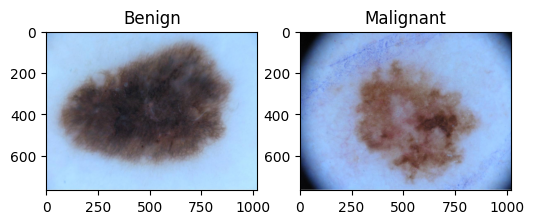

In [9]:
# Load two pre-selected image files to show what they look like
benign_filename = 'ISIC_0000000.jpg'
malignant_filename = 'ISIC_0000002.jpg'
benign_img = cv2.imread(os.path.join(image_folder, benign_filename))
benign_img = cv2.cvtColor(benign_img, cv2.COLOR_BGR2RGB)
malignant_img = cv2.imread(os.path.join(image_folder, malignant_filename))
malignant_img = cv2.cvtColor(malignant_img, cv2.COLOR_BGR2RGB)

# Show the images and their labels
plt.figure(figsize=(6, 3))
plt.subplot(1, 2, 1), plt.imshow(benign_img), plt.title('Benign')
plt.subplot(1, 2, 2), plt.imshow(malignant_img), plt.title('Malignant')
plt.show()

Because we are deciding between distinct outcome categories, we will want to create a ***classification model***. More specifically, we will be creating a binary classifier since we have 2 possible outcomes: 'negative' (benign) and 'positive' (malignant).

# Step 2: Create Your Features and Labels

The labels for our dataset will be the diagnoses associated with each image.

Traditional machine learning models are not able to handle raw image data. Rather, they are best suited for handling tabular data. When we first saw this image dataset, we wrote a series of functions that allowed us to summarize the visual characteristics of each skin lesion according to its asymmetry, border, color, and diameter. These numbers will serve as our features.

This goes to show that knowing about machine learning is often not enough to work with real-world data. Having some domain expertise relevant to the target task can ensure that you are able to extract meaningful features from your data.

All of the code from our initial exploration of this dataset is copied below, so refer to that notebook if you need a reminder of how we came up with these functions.

In [10]:
def extract_contour(seg_img):
    """
    Extracts the lone contour from the image annotation
    seg_img: a binary image representing an annotation
    """
    cnts, hierarchy = cv2.findContours(seg_img, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    return cnts[0]

In [11]:
import math
from scipy.spatial.distance import cdist

def flip_point(point, line_point, angle_deg):
    """
    A helper function that reflects a point over an arbitrary line
    This requires a lot of math, so don't worry if it's not intuitive
    point: the point we are trying to reflect
    line_point: a point that goes through the line
    angle_deg: the angle that defines the slope of the line
    """
    # Convert the angle from degrees to radians
    angle_rad = math.radians(angle_deg)

    # Calculate the coordinates of the point in a coordinate system where line_point is the origin
    translated_point = (point[0] - line_point[0], point[1] - line_point[1])

    # Rotate this coordinate system by an angle of -angle_rad
    rotated_point = (translated_point[0]*math.cos(angle_rad) + translated_point[1]*math.sin(angle_rad),
                     -translated_point[0]*math.sin(angle_rad) + translated_point[1]*math.cos(angle_rad))

    # Reflect the point over the x-axis
    reflected_point = (rotated_point[0], -rotated_point[1])

    # Rotate the coordinate system back by an angle of angle_rad and translate back to original coordinate system
    reflected_translated_back = (reflected_point[0]*math.cos(-angle_rad) + reflected_point[1]*math.sin(-angle_rad),
                                 -reflected_point[0]*math.sin(-angle_rad) + reflected_point[1]*math.cos(-angle_rad))
    final_point = (reflected_translated_back[0] + line_point[0], reflected_translated_back[1] + line_point[1])

    return final_point

def flip_contour(contour, center, angle_deg):
    """
    A helper function reflects an entire contour over its major axis
    contour: the contour
    center: the center of the contour's fit ellipse
    angle_deg: the angle of the contour's fit ellipse
    """
    # Create an array to store the flipped contour points
    flipped_contour = []

    # Flip each point in the contour
    for point in contour:
        flipped_point = flip_point(point[0], center, angle_deg)
        flipped_contour.append(flipped_point)

    # Convert the flipped contour list to an array
    flipped_contour = np.array(flipped_contour, dtype=np.int32).reshape(-1, 1, 2)

    return flipped_contour

def get_hausdorff_distance(cnt1, cnt2):
    """
    A helper function to compute the Haussdorf distance between two contours
    cnt2: the first contour
    cnt2: the second contour
    """
    pts1 = np.array(cnt1).squeeze()
    pts2 = np.array(cnt2).squeeze()
    distances = cdist(pts1, pts2)
    return np.max(np.min(distances, axis=0))

In [12]:
def compute_asymmetry(img, cnt):
    """
    Compute the asymmetry of the skin lesion by comparing the contour with a
    reflected version of itself
    img: the image of the skin lesion
    cnt: the contour of the skin lesion
    """
    # Get the min enclosing ellipse
    center, axes, angle = cv2.fitEllipse(cnt)

    # Flip the contour of the ellipse's major axis
    flipped_cnt = flip_contour(cnt, center, -angle)

    # Measure the difference between the two contours as the Haussdorff distance
    distance = get_hausdorff_distance(cnt, flipped_cnt)

    # Scale the distance according to the diameter for fair comparison
    _, r = cv2.minEnclosingCircle(cnt)
    d = 2*r
    return distance / d

In [13]:
def compute_border(cnt):
    """
    Compute the jaggedness of the skin lesion's border by comparing the
    perimeter of the actual border to the perimeter of the convex hull
    cnt: the contour of the skin lesion
    """
    # Compute the perimeter
    perimeter = cv2.arcLength(cnt, True)

    # Approximate the contour as a convex hull
    hull = cv2.convexHull(cnt)

    # Compute the perimeter of the convex hull
    simplified_perimeter = cv2.arcLength(hull, True)

    # Return the ratio between the two
    return simplified_perimeter / perimeter

In [14]:
def compute_color(img, cnt):
    """
    Compute the color standard deviation of the skin lesion within the contour
    img: the image of the skin lesion
    cnt: the contour of the skin lesion
    """
    # Convert the image to HSV
    hsv_img = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)

    # Recreate the binary mask using the contour
    mask = np.zeros(img.shape[:2], dtype=np.uint8)
    cv2.drawContours(mask, [cnt], -1, (255), thickness=-1)

    # Apply the mask to the image
    masked_img = cv2.bitwise_and(img, img, mask=mask)

    # Compute the variation in HSV color
    mean, stdev = cv2.meanStdDev(masked_img, mask=mask)
    return tuple(stdev.flatten())

In [15]:
def compute_diameter(cnt):
    """
    Compute the radius of the skin lesion according to the min enclosing circle
    cnt: the contour of the skin lesion
    """
    _, r = cv2.minEnclosingCircle(cnt)
    return 2*r

This code is largerly the same as well. However, there are a few small housekeeping changes we will need to make:
1. **Terminology (features):** What we originally called `info_dict` and `info_df` are now called `feature_dict` and `features_df` to reflect the fact that the metrics we extracted from our images will serve as our features.
2. **Terminology (labels):** What we originally called `diagnosis_df` is now called `labels_df` to reflect the fact that the diagnoses will serve as our labels.
3. **Converting strings to numerics:** Because machine learning algorithms operate on numerical data, we have converted the label to a binary variable (`'benign'` = 0, `'malignant'` = `1`). Of course, we can reverse this conversion once we need to have human-interpretable results.

In [16]:
def process_img(filename):
    """
    Process a skin lesion image and produce all of the features according to
    the ABCD(E) rule as a dictionary (one value per key)
    filename: the name of the skin lesion image without the file extension
    """
    # Get the contour filename
    rgb_filename = filename + '.jpg'
    seg_filename = filename + '_Segmentation.png'

    # Get both of the images (RGB and segmentation annotation)
    img = cv2.imread(os.path.join(image_folder, rgb_filename))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    seg_img = cv2.imread(os.path.join(segmentation_folder, seg_filename))
    seg_img = cv2.cvtColor(seg_img, cv2.COLOR_BGR2GRAY)

    # Get the contour
    cnt = extract_contour(seg_img)

    # Extract features from the image
    asymmetry = compute_asymmetry(img, cnt)
    border = compute_border(cnt)
    color = compute_color(img, cnt)
    diameter = compute_diameter(cnt)

    # Combine everything into a feature vector
    feature_dict = {'Asymmetry': asymmetry,
                    'Border': border,
                    'Color Stdev (H)': color[0],
                    'Color Stdev (S)': color[1],
                    'Color Stdev (V)': color[2],
                    'Diameter': diameter}
    return feature_dict

In [17]:
# Get all the filenames but remove the extension
img_filenames = os.listdir(image_folder)
img_filenames = sorted([f[:-4] for f in img_filenames])

# Iterate through the filenames
features_df = pd.DataFrame()
for img_filename in img_filenames:
    # Generate the features
    feature_dict = process_img(img_filename)

    # Add the image name
    feature_dict['Image Name'] = img_filename
    feature_df = pd.DataFrame([feature_dict])
    features_df = pd.concat([features_df, feature_df], axis=0)

# Set the index to the image name
features_df.set_index(['Image Name'], inplace=True)
features_df

,Asymmetry,Border,Color Stdev (H),Color Stdev (S),Color Stdev (V),Diameter
Image Name,,,,,,
ISIC_0000000,0.159122,0.885600,36.083584,39.249347,42.775089,865.640381
ISIC_0000001,0.075846,0.812356,31.941630,25.450673,20.450732,296.289154
ISIC_0000002,0.097556,0.764212,17.352244,28.553130,37.677753,646.436462
ISIC_0000004,0.195895,0.945703,30.190771,34.145424,38.183792,677.091003
ISIC_0000006,0.122100,0.793236,14.238356,26.400896,34.843189,367.912750
...,...,...,...,...,...,...
ISIC_0011393,0.142014,0.756491,17.272032,21.650934,14.052771,251.335861
ISIC_0011397,0.108120,0.916415,18.408460,26.294921,29.453254,846.723877
ISIC_0011398,0.110216,0.946921,25.674441,40.923912,43.537533,717.462463


In [18]:
# Generate labels
labels_df = pd.read_csv(label_filename, header=None)
labels_df.rename(columns={0: 'Image Name', 1: 'Label'}, inplace=True)
labels_df.set_index(['Image Name'], inplace=True)
labels_df['Label'].replace({'benign': 0, 'malignant': 1}, inplace=True)
labels_df

,Label
Image Name,
ISIC_0000000,0
ISIC_0000001,0
ISIC_0000002,1
ISIC_0000004,1
ISIC_0000006,0
...,...
ISIC_0011393,0
ISIC_0011397,0
ISIC_0011398,0


In [19]:
df = features_df.merge(labels_df, left_index=True, right_index=True)
df

,Asymmetry,Border,Color Stdev (H),Color Stdev (S),Color Stdev (V),Diameter,Label
Image Name,,,,,,,
ISIC_0000000,0.159122,0.885600,36.083584,39.249347,42.775089,865.640381,0
ISIC_0000001,0.075846,0.812356,31.941630,25.450673,20.450732,296.289154,0
ISIC_0000002,0.097556,0.764212,17.352244,28.553130,37.677753,646.436462,1
ISIC_0000004,0.195895,0.945703,30.190771,34.145424,38.183792,677.091003,1
ISIC_0000006,0.122100,0.793236,14.238356,26.400896,34.843189,367.912750,0
...,...,...,...,...,...,...,...
ISIC_0011393,0.142014,0.756491,17.272032,21.650934,14.052771,251.335861,0
ISIC_0011397,0.108120,0.916415,18.408460,26.294921,29.453254,846.723877,0
ISIC_0011398,0.110216,0.946921,25.674441,40.923912,43.537533,717.462463,0


# Step 3: Decide How the Data Should Be Split for Training and Testing

The organizers of the ISIC challenge technically provided separate datasets for model training and testing. However, we are going to make our own splits for the sake of practice.

Since we only have one image per person, we can treat the images independently and do not have to worry about splitting our dataset in any fancy way. We are going to do a simple 80%-20% split where 80% of the images will be used for model training and the rest will be used for model testing. We can do this by using the `train_test_split()` function, which takes two input parameters:
1. **arrays:** A list, `numpy` array, or `DataFrame` containing our data
2. **test_size:** The fraction of the data that will be assigned to the test split

In [20]:
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(df, test_size=0.2)
print(f'Number of samples in train data: {len(train_df)}')
print(train_df.head())
print(f'Number of samples in test data: {len(test_df)}')
print(test_df.head())

Number of samples in train data: 720
              Asymmetry    Border  Color Stdev (H)  Color Stdev (S)  \
Image Name                                                            
ISIC_0000104   0.055943  0.943675        25.084096        24.409870   
ISIC_0000182   0.022647  0.945952        18.659347        26.423648   
ISIC_0000102   0.078747  0.942016        24.755063        20.358189   
ISIC_0002948   0.117564  0.719926         6.104034        18.037512   
ISIC_0000506   0.064356  0.949233        17.884071        28.204309   

              Color Stdev (V)     Diameter  Label  
Image Name                                         
ISIC_0000104        22.757733  1119.450317      0  
ISIC_0000182        36.136646   762.233765      0  
ISIC_0000102        19.734589   388.510376      0  
ISIC_0002948        25.276332   819.978821      0  
ISIC_0000506        29.226159   340.786163      0  
Number of samples in test data: 180
              Asymmetry    Border  Color Stdev (H)  Color Stdev (

The splits are randomly decided, which means that we will get a different split each time we call this function. Randomization is important since we want to avoid fine-tuning our pipeline for a very specific configuration. However, randomization can also make it more difficult to debug our code since we won't be able to tell whether we are getting different results because of the randomness or because of changes we made.

One way to avoid this issue is by setting a ***random seed*** — an arbitrarily selected number that controls how random numbers are generated. As we are building our pipeline, we can set the random seed so that we get the same results every time. Once we are confident that everything is working properly, we can "turn off" the random seed by setting it to `None`. We will keep the random seed set in this notebook so that everyone gets the same results when they get to the end.

In [21]:
# Set the random seed to an arbitrary number of your choosing
np.random.seed(42)

# Rerunning this code will always have the same outcome
train_df, test_df = train_test_split(df, test_size=0.2)
print(f'Number of samples in train data: {len(train_df)}')
print(train_df.head())
print(f'Number of samples in test data: {len(test_df)}')
print(test_df.head())

Number of samples in train data: 720
              Asymmetry    Border  Color Stdev (H)  Color Stdev (S)  \
Image Name                                                            
ISIC_0000016   0.109238  0.901202        32.928118        35.001192   
ISIC_0000529   0.258364  0.755348        16.619818        29.196806   
ISIC_0000372   0.069317  0.955036        15.458576        34.799232   
ISIC_0010337   0.089023  0.937470        19.586414        38.025546   
ISIC_0000485   0.122999  0.521785        17.324891        32.510149   

              Color Stdev (V)    Diameter  Label  
Image Name                                        
ISIC_0000016        36.819608  509.524963      0  
ISIC_0000529        32.165800  866.459656      0  
ISIC_0000372        46.385351  496.403015      0  
ISIC_0010337        40.507394  502.983063      0  
ISIC_0000485        35.173066  940.358276      0  
Number of samples in test data: 180
              Asymmetry    Border  Color Stdev (H)  Color Stdev (S)  \
I

Once we have our train and test splits, we will separate our data back into features and labels since `scikit-learn` models require `numpy` arrays as input.

In [22]:
x_train = train_df.drop('Label', axis=1).values
y_train = train_df['Label'].values
x_test = test_df.drop('Label', axis=1).values
y_test = test_df['Label'].values

# Step 4: (Optional) Add Feature Selection

Given that we only have a few features and they are informed by domain expertise, we are going to skip this step and assume that we have a reasonable set of features.

# Step 5: (Optional) Balance Your Dataset

We can check the balance of our dataset by looking at the frequency of values in our labels column. We can do this by checking either the `DataFrames` or the `numpy` arrays:

In [23]:
def print_label_dist(y):
    """
    Prints out the balance between positive and negative samples
    y: a 1D array of labels
    """
    num_neg = np.count_nonzero(y == 0)
    num_pos = np.count_nonzero(y == 1)
    print(f'Number of benign samples: {num_neg}')
    print(f'Number of malignant samples: {num_pos}')
    print(f'Fraction of positive samples: {num_pos/(num_pos+num_neg):0.2f}')

In [24]:
print_label_dist(df['Label'].values)

Number of benign samples: 727
Number of malignant samples: 173
Fraction of positive samples: 0.19


Notice that we have many more benign cases than we do malingant ones in our overall dataset. This imbalance trickles down once we split our data into train and test sets.

In [25]:
print_label_dist(y_train)

Number of benign samples: 579
Number of malignant samples: 141
Fraction of positive samples: 0.20


In [26]:
print_label_dist(y_test)

Number of benign samples: 148
Number of malignant samples: 32
Fraction of positive samples: 0.18


For now, we are going to leave this undisturbed, but we will revisit this issue the next time we look at this model.

# Step 6: Select an Appropriate Model

`scikit-learn` provides numerous classification model architectures with their own advantages and disadvantages. For now, we are going to stick with a ***random forest classifier***, which uses a collection of decision trees to make a decision.

In [27]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()

# Step 7: (Optional) Select Your Hyperparameters

For now, we are going to stick with the default hyperparameters for our model.

# Step 8: Train and Test Your Model

We are finally ready to train our machine learning model! All we need to do is call the `.fit()` method while providing the features and labels from our training dataset. Underneath the hood, the model will adjust its underlying parameters and decision boundaries in order to optimize its performance on that data.

In [28]:
clf.fit(x_train, y_train)

RandomForestClassifier()

Once we've trained the model, we can see how the model would classify a set of features by calling the `.predict()` method. People often forgo generating predictions for the training dataset since it will not give us a real indication of how the model will perform on previously unseen data. However, we will generate predictions for both our training and test data so that we can compare the model accuracy on both sets.

In [29]:
y_train_pred = clf.predict(x_train)
y_test_pred = clf.predict(x_test)

To plot an ROC curve, we actually need to generate our predictions a slightly different way. Rather than generating binary predictions (`0` or `1`), we will need to generate probabilistic predictions that indicate the likelihood that the given sample belongs to the positive class.

We can do this by calling `.predict_proba()` instead of `.predict()` on our model. This function produces an $n \times c$ array. $n$ is the number of samples, and $c$ is the number of classes we have in our dataset. The number in row $n_i$ and column $c_j$ indicates the likelihood that sample $i$ belongs to class $j$ according to our model.

Let's compare the output of `.predict()` and `.predict_proba()` on a subset of our training dataset features:

In [30]:
y_binary = clf.predict(x_train[:10, :])
y_prob = clf.predict_proba(x_train[:10, :])
print(y_binary)
print(y_prob)

[0 0 0 0 0 0 1 0 0 0]
[[0.96 0.04]
 [0.95 0.05]
 [0.95 0.05]
 [0.95 0.05]
 [0.94 0.06]
 [0.93 0.07]
 [0.39 0.61]
 [0.91 0.09]
 [0.92 0.08]
 [0.94 0.06]]


Notice that only the 7th row has a `1` in the output of `.predict()`, indicating that it was the only sample that was predicted to be malignant out of the 10 samples. The corresponding row in the output of `predict_proba()` is the only one where the value on the left is less than the value on the right, reflecting the fact that the model was more confident that the sample was malignant instead of benign.

Since we only have two classes, we are simply going to save the rightmost column, which indicates the likelihood that each sample belongs to the positive class (`malignant`) according to our model.

In [31]:
y_train_pred_prob = clf.predict_proba(x_train)[:, 1]
y_test_pred_prob = clf.predict_proba(x_test)[:, 1]

# Step 9: Use an Appropriate Method for Interpreting Results

Now that we have predictions, we will examine a variety of metrics to see how well our model performed. Most of the functions we will discuss in this section require two inputs:
1. **y_true:** The known ground-truth labels from our dataset
2. **y_pred:** The labels predicted from the model

We will start by examining how well our model worked on the training dataset, after which we will revisit them for our test dataset.

## Confusion Matrix

We can manually generate and save a confusion matrix using the `confusion_matrix()` function:

In [32]:
from sklearn.metrics import confusion_matrix

# Generate the confusion matrix
cm = confusion_matrix(y_train, y_train_pred)
print(cm)

# Split the confusion matrix according to decision outcomes
tn = cm[0][0]
fp = cm[0][1]
fn = cm[1][0]
tp = cm[1][1]
print(f'True positives: {tp}')
print(f'True negatives: {tn}')
print(f'False positives: {fp}')
print(f'False negatives: {fn}')

[[579   0]
 [  0 141]]
True positives: 141
True negatives: 579
False positives: 0
False negatives: 0


However, most people prefer to generate a figure that shows the visualization since that's what ends up getting put into a paper or report. `scikit-learn` provides a handy class called `ConfusionMatrixDisplay` for creating such a visualization.

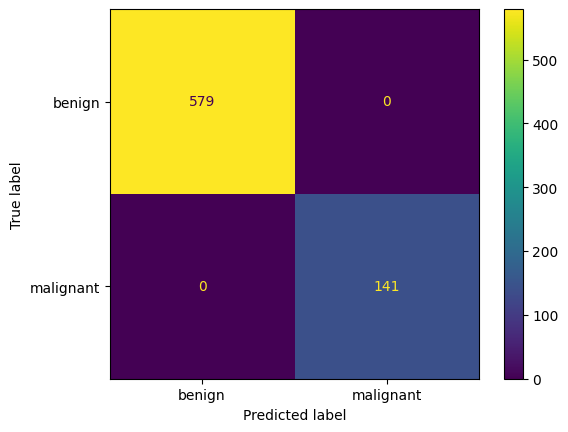

In [33]:
from sklearn.metrics import ConfusionMatrixDisplay
classes = ['benign', 'malignant']
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred,
                                        display_labels=classes)
plt.show()

## Classification Accuracy Rates

The `metrics` module provides numerous functions you can call to calcluate various scores. A few examples are provided below:

In [34]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

print(f'Accuracy: {accuracy_score(y_train, y_train_pred)}')
print(f'F1 Score: {f1_score(y_train, y_train_pred)}')
print(f'Precision: {precision_score(y_train, y_train_pred)}')
print(f'Recall: {recall_score(y_train, y_train_pred)}')

Accuracy: 1.0
F1 Score: 1.0
Precision: 1.0
Recall: 1.0


Unfortunately, it does not provide functions for calculating sensitivity and specificity, which are commonly used in medical applications. However, we can calculate these ourselves using the entries of the confusion matrix:

In [35]:
# Get the confusion matrix
cm = confusion_matrix(y_train, y_train_pred)
tn = cm[0][0]
fp = cm[0][1]
fn = cm[1][0]
tp = cm[1][1]

# Calculate sensitivity and specificity
sens = tp / (tp+fn)
spec = tn / (tn+fp)
print(f'Sensitivity: {sens}')
print(f'Specificity: {spec}')

Sensitivity: 1.0
Specificity: 1.0


`classification_report()` provides a quick printout of commonly used classification accuracy metrics. This table breaks down the performance across the individual classes, which can be useful for determining whether your model is performing better for one class versus another. This table breaks down what each of the numbers represents:

| |Precision|Recall|F1-Score|Support|
|-----|-----|-----|-----|-----|
| **Benign** | Precision if it considered `benign` to be the positive label | Recall if it considered `benign` to be considered the positive label | F1-score if it considered `benign` to be considered the positive label | The number of examples that were labeled `benign` |
| **Malignant** | Precision if it considered `malignant` to be the positive label | Recall if it considered `malignant` to be considered the positive label | F1-score if it considered `malignant` to be considered the positive label | The number of examples that were labeled `malignant` |
| **Accuracy** | | | The F1-score across the entire dataset | The nubmer of examples in the entire dataset |
| **Macro avg** | The unweighted average precision across both classes | The unweighted average recall across both classes | The unweighted average F1-score across both classes | The nubmer of examples in the entire dataset |
| **Weighted avg** | The weighted average precision across both classes | The weighted average recall across both classes | The weighted average F1-score across both classes | The nubmer of examples in the entire dataset |


In [36]:
from sklearn.metrics import classification_report
print(classification_report(y_train, y_train_pred, target_names=classes))

              precision    recall  f1-score   support

      benign       1.00      1.00      1.00       579
   malignant       1.00      1.00      1.00       141

    accuracy                           1.00       720
   macro avg       1.00      1.00      1.00       720
weighted avg       1.00      1.00      1.00       720



## ROC Curve

We can generate the raw data for an ROC curve using `roc_curve()` and the area under the curve (AUC) using `auc_roc_score()`. Instead of providing the predicted binary labels from our model, we will need to provide the predicted likelihood scores that were output by `.predict_proba()`.

In [37]:
from sklearn.metrics import roc_curve, roc_auc_score
fpr, tpr, thresholds = roc_curve(y_train, y_train_pred_prob)
auc = roc_auc_score(y_train, y_train_pred_prob)
print(f'AUC: {auc}')

AUC: 1.0


Similar to what we said about confusion matrices, however, `scikit-learn` provides a handy function for generating an ROC curve visualization for us.

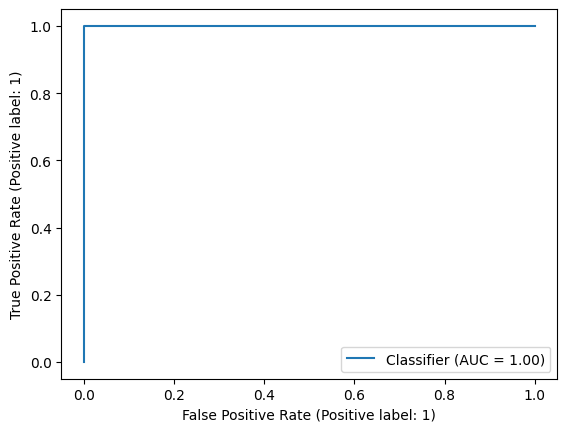

In [38]:
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_predictions(y_train, y_train_pred_prob)
plt.show()

## Comparing Performance on Train and Test Data

Let's create a function that will generate a detailed classification accuracy report combining a subset of the aforementioned metrics and visualizations:

In [39]:
def classification_evaluation(y_true, y_pred, y_pred_prob):
    """
    Generate a series of graphs that will help us determine the performance of
    a binary classifier model
    y_true: the target binary labels
    y_pred: the predicted binary labels
    y_pred_prob: the predicted likelihood scores for a positive label
    """
    # Calculate f1 score, sensitivity, and specificity
    cm = confusion_matrix(y_true, y_pred)
    tn = cm[0][0]
    fp = cm[0][1]
    fn = cm[1][0]
    tp = cm[1][1]
    acc = accuracy_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    sens = tp / (tp+fn)
    spec = tn / (tn+fp)

    # Generate the confusion matrix
    classes = ['benign', 'malignant']
    cm_title = f'Confusion Matrix \n(Sensitivity: {sens:0.2f}, Specificity: {spec:0.2f})'
    ConfusionMatrixDisplay.from_predictions(y_true, y_pred, display_labels=classes)
    plt.title(cm_title)
    plt.show()

    # Display the ROC curve
    roc_title = f'ROC Curve \n(Acc: {acc:0.2f}, F1 score: {f1:0.2f})'
    RocCurveDisplay.from_predictions(y_true, y_pred_prob)
    plt.title(roc_title)
    plt.show()

Let's run this function on both our train and test predictions to see the disparity in performance:

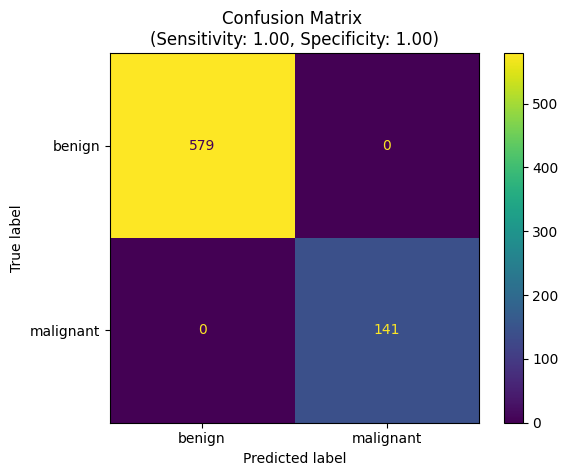

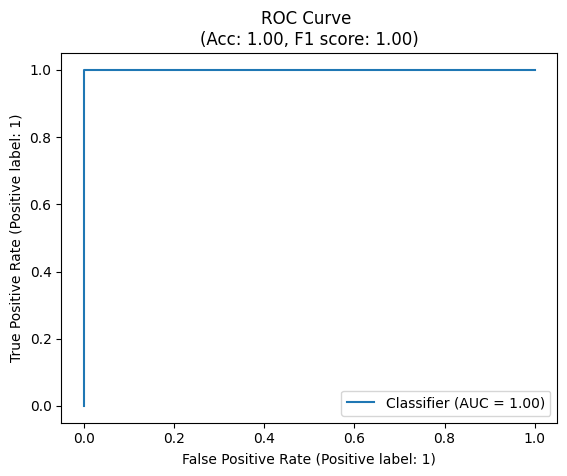

In [40]:
classification_evaluation(y_train, y_train_pred, y_train_pred_prob)

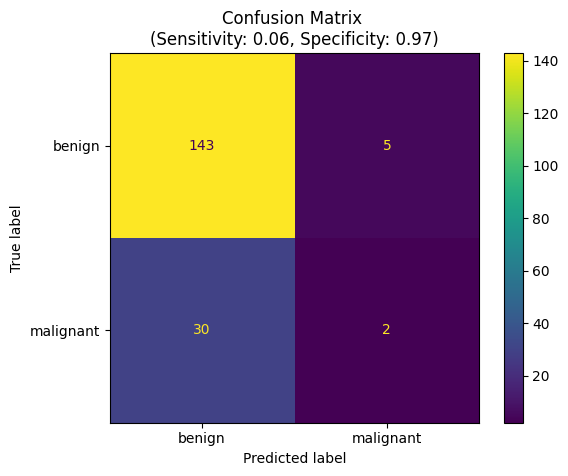

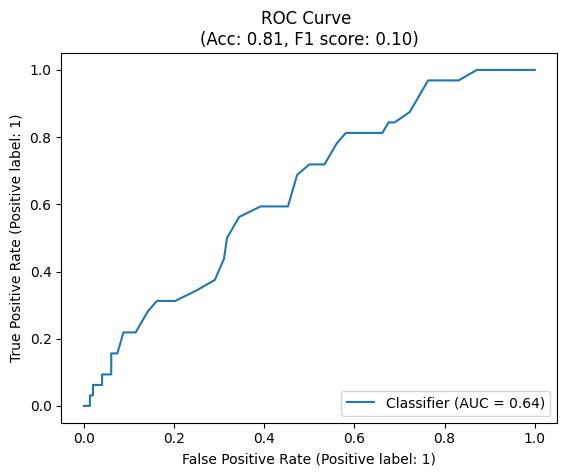

In [41]:
classification_evaluation(y_test, y_test_pred, y_test_pred_prob)

So what can we learn from all of these results:
* As we saw earlier, our dataset has many more benign cases than it does malignant cases. This imbalance could bias our model to assume that skin lesions are benign.
* Our model achieved perfect accuracy on our training dataset, which means that the model was able to learn something useful from the features we provided.
* While it looks like we achieved high accuracy on our test dataset as well, that is because most of our test data involved benign cases and our model was biased towards making benign predictions. If we look more closely at sensitivity and F1 score, we can confirm that this model is actually performing poorly on the test dataset.

To summarize, our model was able to learn from the features we provided, but it did not generalize to the unseen test dataset. We are going to revisit this machine learning pipeline in a later session to see how we can improve its ability to generalize to new data.